# Clustering with Machine Learning

This notebook provides an introduction to clustering techniques in machine learning. 
We will explore **KMeans**, **DBSCAN**, and **Hierarchical Clustering** algorithms to partition datasets into homogeneous groups. 

Clustering is essential for various applications, from market segmentation to data analysis. Let's dive in!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Unzip the Dataset if you need to do it

In [2]:
import zipfile
with zipfile.ZipFile('dataset/dataset_clustering.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset/')

### Data Loading and Exploration 

In [3]:
dummy_dataset = pd.read_csv("dataset/blob_data2D.csv", sep=",")
dummy_dataset.head()

,Unnamed: 0,0,1
0,2,2.525110,-1.508248
1,3,7.468238,-2.286283
2,2,2.107254,-0.468814
3,3,7.114966,-1.163047
4,3,8.696331,-0.846592


In [4]:
# Data shape
print(dummy_dataset.shape)
print(type(dummy_dataset))

(4000, 3)
<class 'pandas.core.frame.DataFrame'>


#### Visualize data using scatter plot


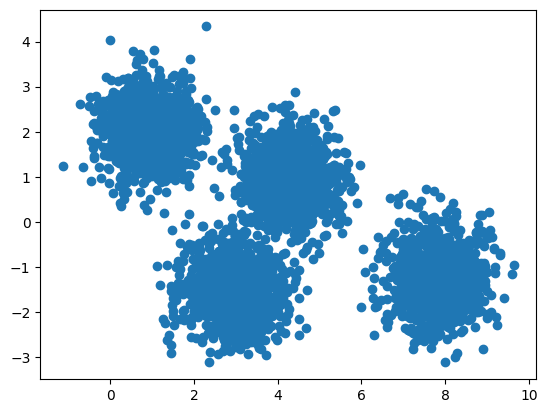

In [5]:
plt.scatter(dummy_dataset.iloc[:, 1], dummy_dataset.iloc[:,2])
plt.show()

## *Clustering Techniques*

## **Kmeans**

Look at [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

Write a function to call KMeans constructor and fit method

In [6]:
from sklearn.cluster import KMeans 

def build_kmeans(n_clusters, data, init = "k-means++" , n_init = "auto", max_iter = 300):
  kmeans = KMeans(n_clusters=n_clusters, init=init, n_init = n_init, max_iter = max_iter)
  kmeans = kmeans.fit(data) 
  return kmeans

Convert in numpy array and delete one column in order to have 2-dimensional data


In [7]:
my_dummy_data = dummy_dataset.to_numpy()
print(my_dummy_data[:5],'\n')

my_dummy_data = np.delete(my_dummy_data, 0, axis=1)
print(my_dummy_data[:5])

[[ 2.          2.52510964 -1.50824765]
 [ 3.          7.46823809 -2.28628272]
 [ 2.          2.10725384 -0.4688143 ]
 [ 3.          7.11496573 -1.16304687]
 [ 3.          8.69633062 -0.8465918 ]] 

[[ 2.52510964 -1.50824765]
 [ 7.46823809 -2.28628272]
 [ 2.10725384 -0.4688143 ]
 [ 7.11496573 -1.16304687]
 [ 8.69633062 -0.8465918 ]]


#### Normalizing Data
Data normalization is a crucial preprocessing step that brings data to a common scale, enabling fair comparisons and enhancing the performance of machine learning models.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
my_dummy_data = scaler.fit_transform(my_dummy_data)

Create 4 clusters from data using the previously defined function

In [9]:
kmeans4 = build_kmeans(4, my_dummy_data)

# Print the centers of the clusters
kmeans4.cluster_centers_

array([[-1.19001006,  1.22801815],
       [ 1.48225   , -0.81069458],
       [ 0.12206124,  0.56876915],
       [-0.4067452 , -0.98539393]])

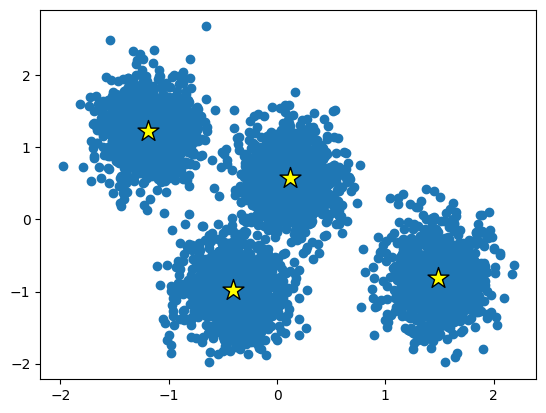

In [10]:
plt.scatter(my_dummy_data[:, 0], my_dummy_data[:,1])
plt.scatter(kmeans4.cluster_centers_[:,0], kmeans4.cluster_centers_[:,1], s= 250, marker="*", 
            c="yellow", edgecolors="black")

plt.show()

In [11]:
# Create 3 clusters from data using the previously defined function
kmeans3 = build_kmeans(3, my_dummy_data)

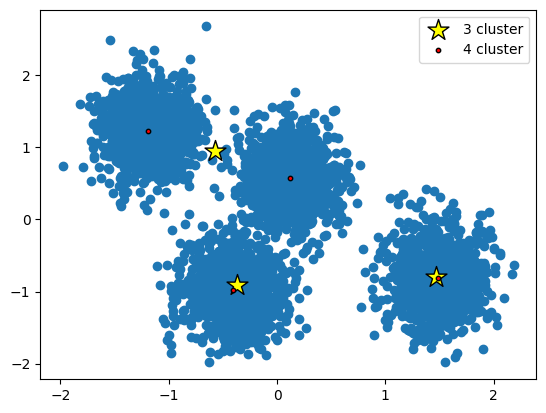

In [12]:
# Visualize the data with the final centroids for both the models
plt.scatter(my_dummy_data[:, 0], my_dummy_data[:,1])
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s= 250, marker="*", 
            c="yellow", edgecolors="black", label='3 cluster')
plt.scatter(kmeans4.cluster_centers_[:,0], kmeans4.cluster_centers_[:,1], s= 10, marker="o", 
            c="red", edgecolors="black", label='4 cluster')

plt.legend()
plt.show()

In [13]:
# calling labels_ attribute we can see the cluster label of each point
print(kmeans4.labels_.shape )
print(kmeans4.labels_) 

(4000,)
[3 1 3 ... 0 3 0]


### **Clustering Evaluation**
Numerical measures that are applied to judge various aspects of cluster validity, are classified into the following two types.
- `Supervised`: Used to measure the extent to which cluster labels match externally supplied class labels.
    - Entropy
    - Often called external indices because they use information external to the data
- `Unsupervised`: Used to measure the goodness of a clustering structure without respect to external information.
    - Sum of Squared Error (SSE)
    - Often called internal indices because they only use information in the data

You can use supervised or unsupervised measures to compare clusters or clusterings

---

### **Unsupervised Measures: Cohesion and Separation**
- `Cluster Cohesion`: Measures how closely related are objects in a cluster
    - Example: SSE
- `Cluster Separation`: Measure how distinct or well separated a cluster is from other clusters

Example: Squared Error
- Cohesion is measured by the within cluster sum of squares (SSE)
    $$SSE = \sum_i \sum_{x \in C_i}(x-m_i)^2$$
- Separation is measured by the between cluster sum of squares
    $$SSB = \sum_i |c_i|(x-m_i)^2$$
Where $|c_i|$ is the size of cluster i

---

### **Unsupervised Measures: Silhouette Coefficient**
Silhouette coefficient combines ideas of both cohesion and separation, but for individual points, as well as clusters and clusterings
- For an individual point, $i$
    - Calculate $a$ = `average distance` of $i$ to the points in its cluster
    - Calculate $b$ = `min (average distance of $i$ to points in another cluster)`
    - The silhouette coefficient for a point is then given by
    $$s = (b-a) / max(a,b)$$

- Value can vary between -1 and 1
- Typically ranges between 0 and 1.
- The closer to 1 the better.

---

### **Measuring Cluster Validity Via Correlation**
Two matrices
- Proximity Matrix
- Ideal Similarity Matrix
    - One row and one column for each data point
    - An entry is 1 if the associated pair of points belong to the same cluster
    - An entry is 0 if the associated pair of points belongs to different clusters
- Compute the correlation between the two matrices
    - Since the matrices are symmetric, only the correlation between $n(n-1) / 2$ entries needs to be calculated.
-  High magnitude of correlation indicates that points that belong to the same cluster are close to each other.
    - Correlation may be positive or negative depending on whether the similarity matrix is a similarity or dissimilarity matrix
- Not a good measure for some density or contiguity based clusters.

In [17]:
preds = kmeans4.predict(my_dummy_data)
ground_truth = dummy_dataset.to_numpy(dtype=int)[:,0]

In [18]:
print(preds)
print(ground_truth)

[3 1 3 ... 0 3 0]
[2 3 2 ... 1 2 1]


In [21]:
new_map = {0:2, 1:0, 2:3, 3:1}

def label_mapping(labels, new_map):
    new_labels = [new_map[label] for label in labels]
    return new_labels

new_ground_truth = label_mapping(ground_truth, new_map)

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(new_ground_truth, preds)
print(f'Accuracy: {accuracy}')

Accuracy: 0.99475


In [23]:
from sklearn.metrics import adjusted_rand_score

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(new_ground_truth, preds)
print("Adjusted Rand Index (ARI):", ari)


Adjusted Rand Index (ARI): 0.9860802613992619


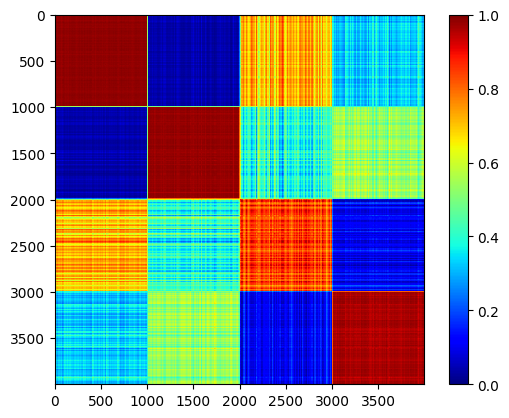

In [24]:
import numpy as np
from sklearn.metrics import pairwise_distances

pairwisedist = pairwise_distances(my_dummy_data, metric='cosine')

# sorting by labels
sorted_pairwisedist = pairwisedist[np.argsort(kmeans4.labels_)][:, np.argsort(kmeans4.labels_)]
labels = kmeans4.labels_[np.argsort(kmeans4.labels_)]

# keeping the distance values between 0 and 1.
sorted_pairwisedist = sorted_pairwisedist / np.max(sorted_pairwisedist)
sorted_similarity = 1- sorted_pairwisedist / np.max(sorted_pairwisedist)

#plotting 
import matplotlib.pyplot as plt
plt.imshow(sorted_similarity,cmap ='jet')
plt.colorbar()
plt.show()

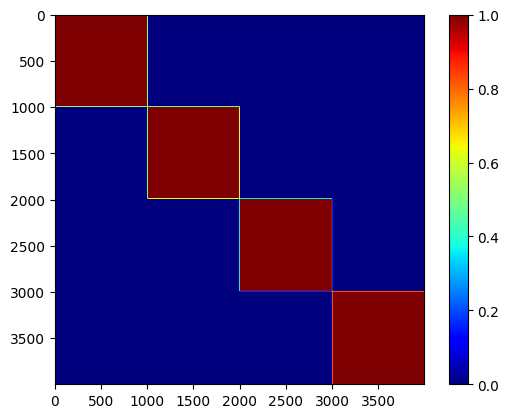

In [25]:
incidence_matrix = np.zeros_like(sorted_similarity)
for i in range(len(labels)):
    for j in range(len(labels)):
        incidence_matrix[i,j] = int(labels[i] == labels[j])

plt.imshow(incidence_matrix,cmap ='jet')
plt.colorbar()
plt.show()

In [26]:
corr_org = np.corrcoef(sorted_pairwisedist.flatten(), incidence_matrix.flatten())[0, 1]
corr_org

-0.6947502038991512

### **Statistical Framework**

Cluster validation requires a way to understand and interpret evaluation measures.
- For example, if our measure of evaluation has the value, 10, is that good, fair, or poor?

**Statistics provide a helpful framework for this**. We can compare the values of our evaluation measure with those obtained from random data.

If the value we observe is highly unlikely to occur by random chance, it indicates that our clusters are likely valid and not simply a result of randomness.

- The more “atypical” a clustering result is, the more likely it represents valid structure in the data
- Compare the value of an index obtained from the given data with those resulting from random data.
     If the value of the index is unlikely, then the cluster results are valid

In [27]:
corrhist =[]
ssehist =[]
ranges = [(my_dummy_data[col].min(), my_dummy_data[col].max()) for col in [0,1]] # specify different ranges for each column
for seed in range(0,500):
  np.random.seed(seed)
  randomdata = np.random.default_rng().uniform(low=ranges[0][0], high=ranges[0][1], size=(100, 1))
  for r in ranges[1:]:
      randomdata = np.concatenate((randomdata, np.random.randint(low=r[0], high=r[1], size=(100, 1))), axis=1)
  randomdf = pd.DataFrame(randomdata)

#scaling random df
  scaledranddf = scaler.fit_transform(randomdf)
#clustering each df
  clfr = KMeans(n_clusters = 3)
  clfr.fit(scaledranddf)
  labels = clfr.labels_[np.argsort(clfr.labels_)]

#distance matrix for each random df
  pairwisedistr = pairwise_distances(scaledranddf, metric='cosine')
  sorted_pairwisedistr = pairwisedist[np.argsort(labels)][:, np.argsort(labels)]

#Ideal Similarity matrix for each randomdf
  incidence_matrixr = np.zeros_like(sorted_pairwisedistr)
  for i in range(len(labels)):
      for j in range(len(labels)):
          incidence_matrixr[i,j] = int(labels[i] == labels[j])

#calculating correlation of proximity matrix(distance) and Incidence matrix (Ideal similarity)
  corrhist.append(np.corrcoef(sorted_pairwisedistr.flatten(), incidence_matrixr.flatten())[0, 1])
  ssehist.append(clfr.inertia_)

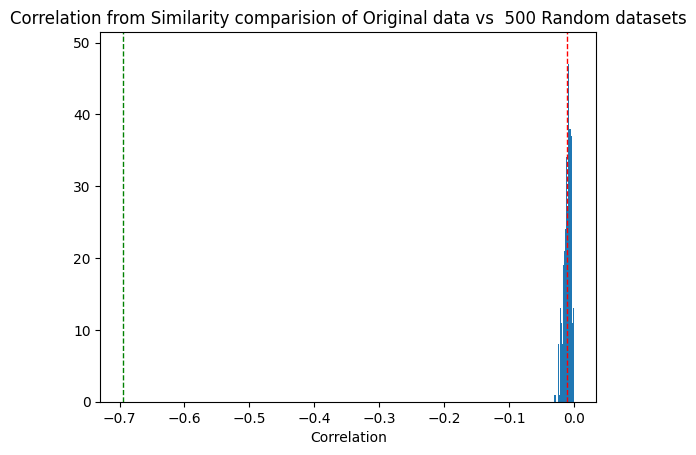

In [28]:
plt.hist(corrhist,bins=30)
plt.axvline(np.mean(corrhist),color='red',linestyle='dashed',linewidth=1)
plt.axvline(corr_org,color='green',linestyle='dashed',linewidth=1)
plt.title('Correlation from Similarity comparision of Original data vs  500 Random datasets')
 
plt.xlabel('Correlation')
plt.show()

The green line represents the value of metric for the original dataset while the red line is the mean of the metric‘s value for the 500 random datasets.

### **Selecting the optimal number of clusters**

#### Elbow Method for Determining the Optimal Number of Clusters in K-means

The elbow method for determining the optimal number of clusters in K-means involves:

1. Computing the Within-Cluster Sum of Squares (WCSS) for different values of k (the number of clusters).
2. Plotting k against WCSS.
3. Identifying the "elbow" point in the plot, where the rate of decrease of WCSS slows down significantly.
4. Selecting the number of clusters corresponding to this elbow point as the optimal number of clusters for the dataset.

- Note that: `kMeans.inertia` = WCSS


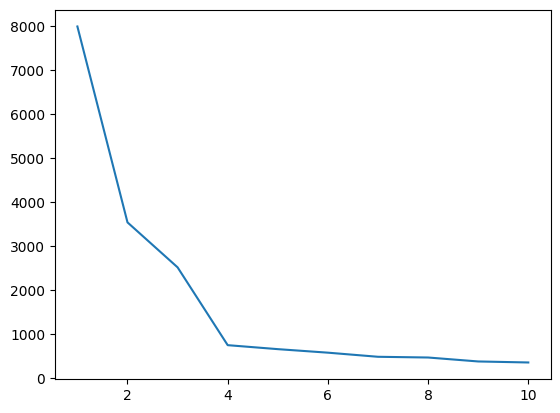

In [29]:
number_of_cluster = 11
error = [] # array to collect the measure values
for i in range(1, number_of_cluster):
  kmeans = build_kmeans(i, my_dummy_data)
  error.append(kmeans.inertia_) 

plt.plot(range(1,number_of_cluster),error )
plt.show()

In [30]:
error[-1]

359.8745272855977

#### Selecting the number of clusters with silhouette analysis on KMeans clustering
Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of `[-1, 1]`.

Silhouette coefficients (as these values are referred to as) near `+1` indicate that the sample is far away from the neighboring clusters. A value of `0` indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Also from the thickness of the silhouette plot the cluster size can be visualized.

[see here](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)

For n_clusters = 2 The average silhouette_score is : 0.486055401763723
For n_clusters = 3 The average silhouette_score is : 0.5755736314698844
For n_clusters = 4 The average silhouette_score is : 0.6510826142312157
For n_clusters = 5 The average silhouette_score is : 0.58110206366716
For n_clusters = 6 The average silhouette_score is : 0.5009535977446538


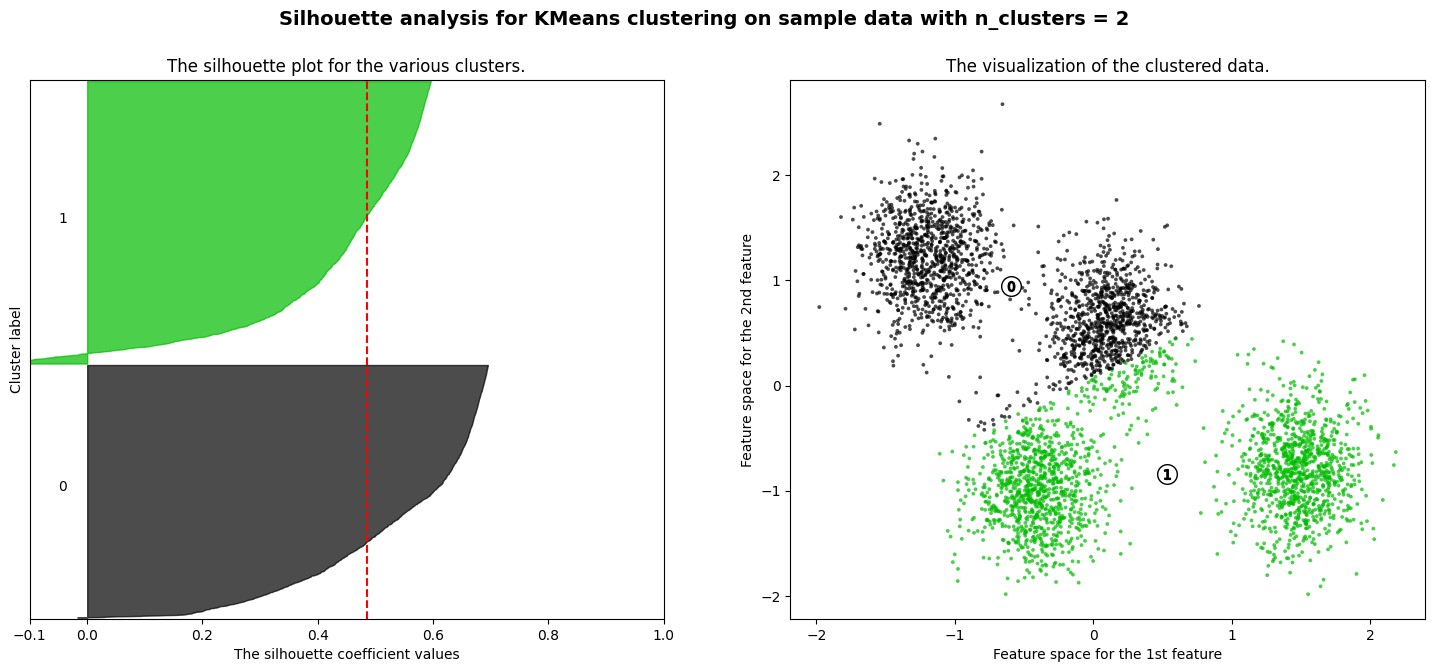

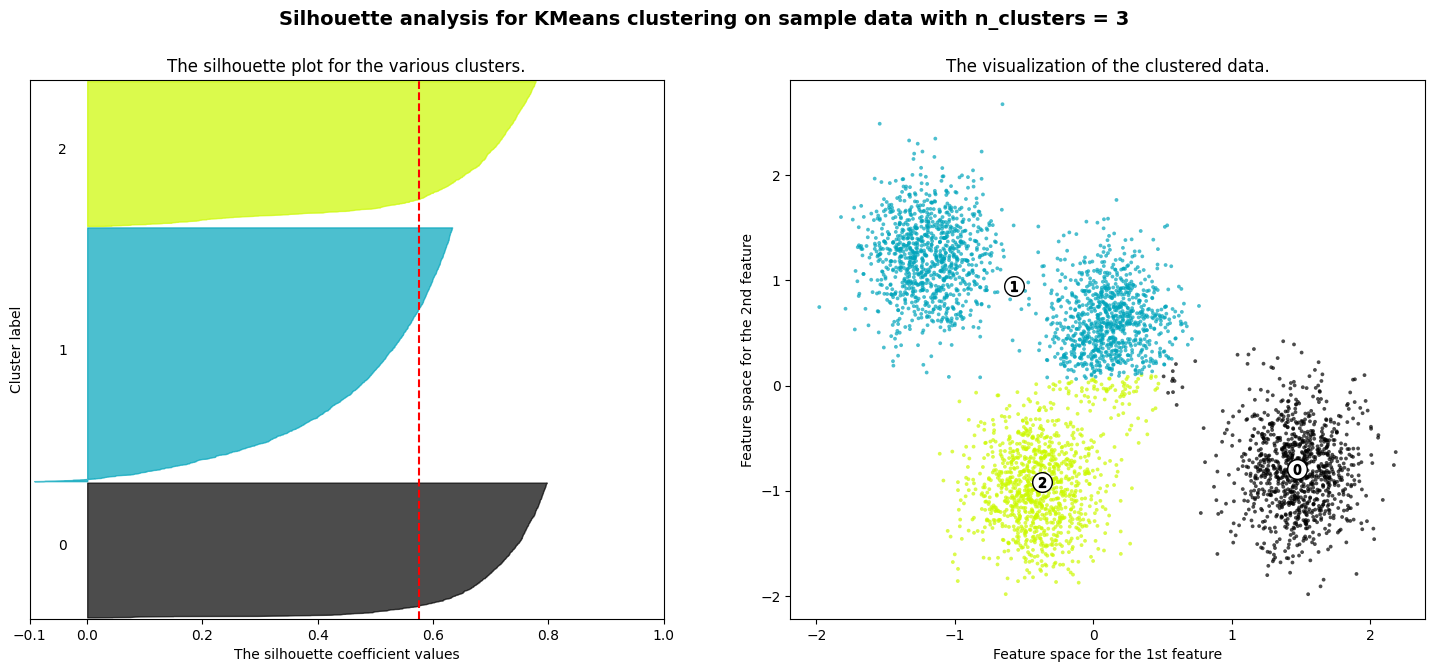

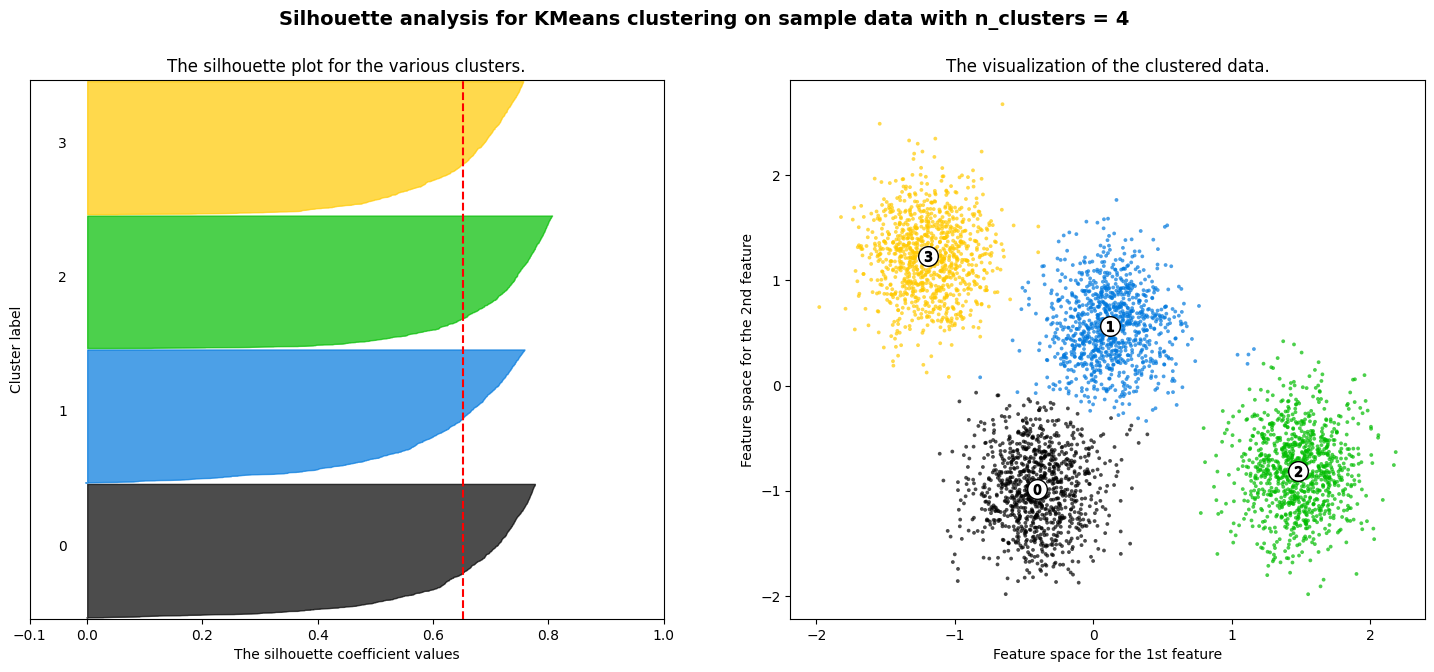

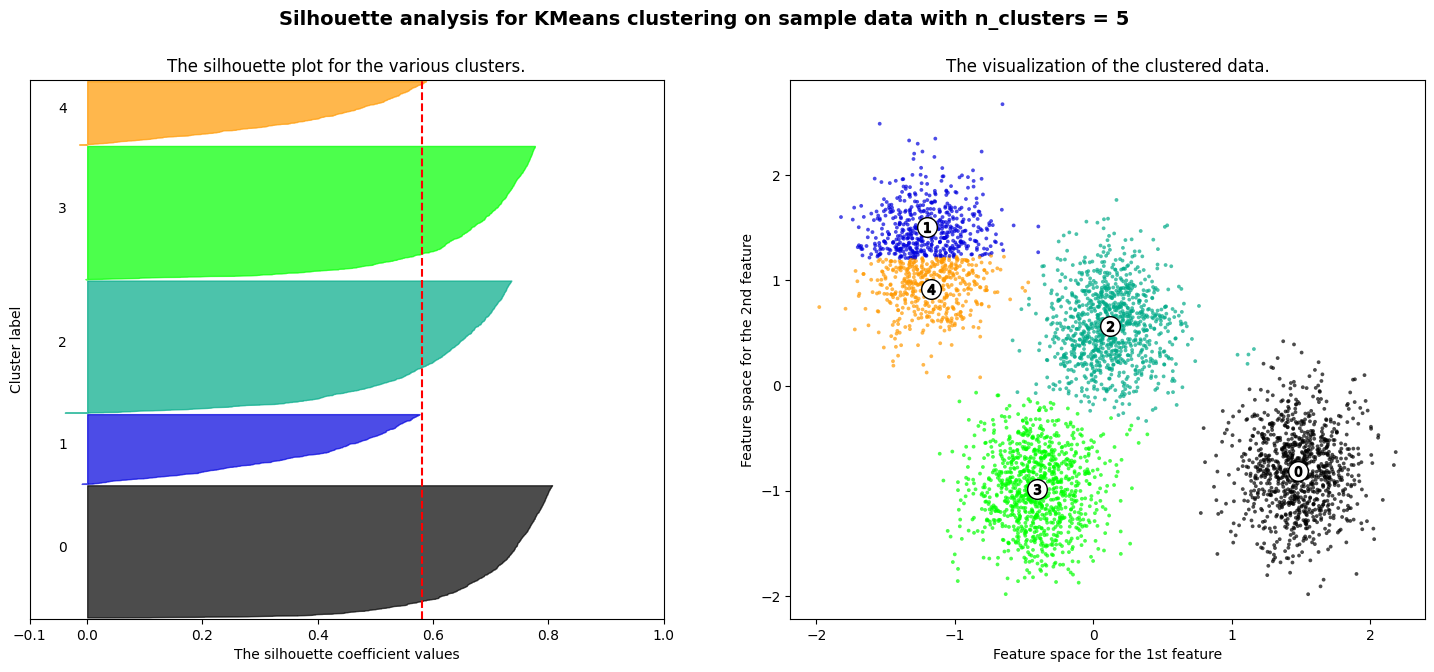

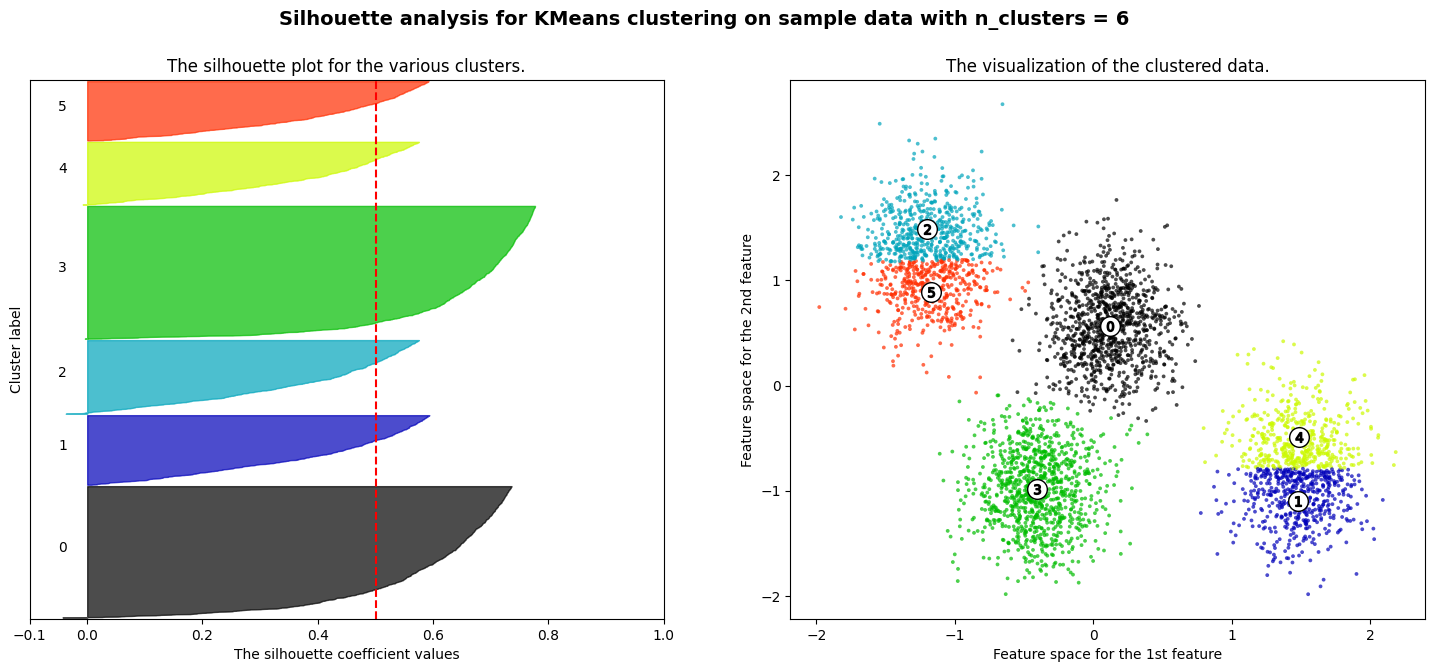

In [31]:
import matplotlib.cm as cm

from sklearn.metrics import silhouette_samples, silhouette_score

X = my_dummy_data.copy()

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters
    clusterer = build_kmeans(n_clusters, X)
    cluster_labels = clusterer.predict(X)


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### `Random` vs `k-means++` initialization

- `k-means++` : selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique **speeds up convergence**. The algorithm implemented is “greedy k-means++”. It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.
- `random`: choose n_clusters observations (rows) at random from data for the initial centroids.

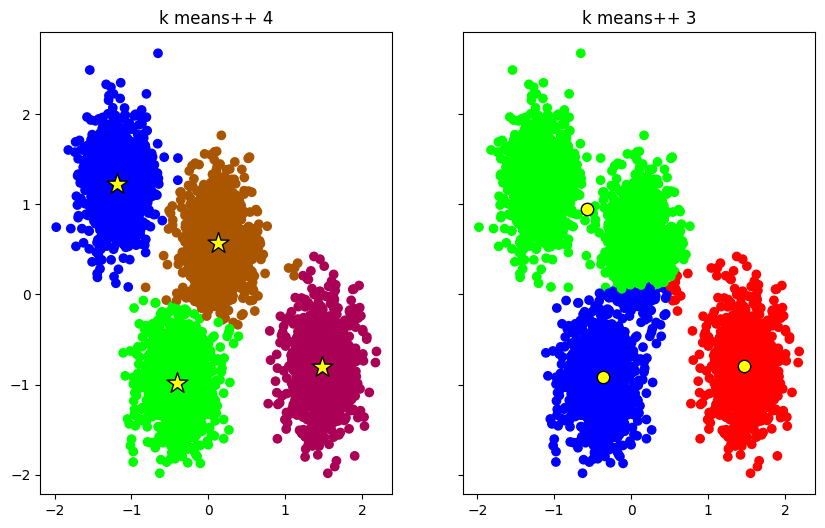

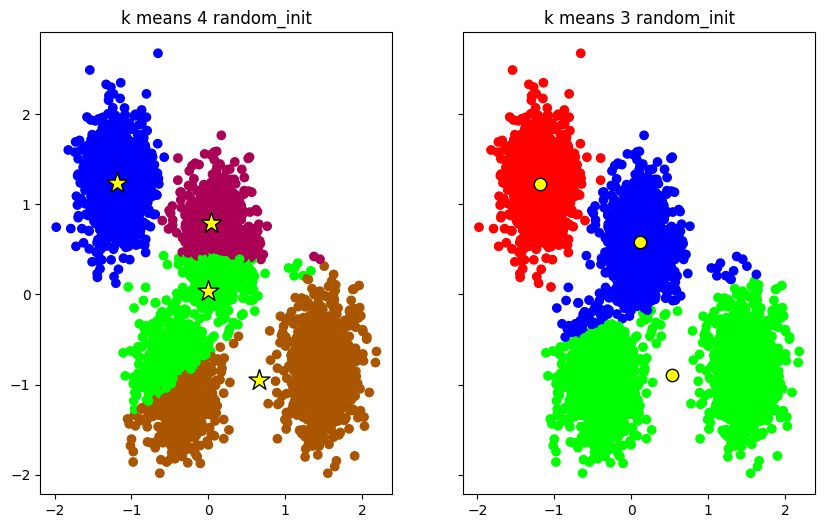

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.set_title("k means++ 4")
ax2.set_title("k means++ 3")

ax1.scatter(my_dummy_data[:,0], my_dummy_data[:,1], c = kmeans4.labels_, cmap ="brg" )
ax1.scatter(kmeans4.cluster_centers_[:,0], kmeans4.cluster_centers_[:,1], s = 250, marker = "*", c="yellow", edgecolors="black")

ax2.scatter(my_dummy_data[:,0], my_dummy_data[:,1], c = kmeans3.labels_, cmap ="brg" )
ax2.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 80, marker = "o", c="yellow", edgecolors="black")

##################################################################################

kmeans4_rand = build_kmeans(4, my_dummy_data, "random", 1, 2)
kmeans3_rand = build_kmeans(3, my_dummy_data, "random", 1, 2)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.set_title("k means 4 random_init")
ax2.set_title("k means 3 random_init")

ax1.scatter(my_dummy_data[:,0], my_dummy_data[:,1], c = kmeans4_rand.labels_, cmap ="brg" )
ax1.scatter(kmeans4_rand.cluster_centers_[:,0], kmeans4_rand.cluster_centers_[:,1], s = 250, marker = "*", c="yellow", edgecolors="black")

ax2.scatter(my_dummy_data[:,0], my_dummy_data[:,1], c = kmeans3_rand.labels_, cmap ="brg" )
ax2.scatter(kmeans3_rand.cluster_centers_[:,0], kmeans3_rand.cluster_centers_[:,1], s = 80, marker = "o", c="yellow", edgecolors="black")
plt.show()

## **DBSCAN**

To find the best parameters **Eps** and **MinPts** for DBSCAN we can use the elbow method by plotting the distance of the `k_th` neighbors. 

To do this we can use the methods provided by the class [`NearestNeighbors`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors).

In particular we can use the kneighbors method (applied on the trained model) to find the **K-neighbors** of a point.

Look at DBSCAN [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

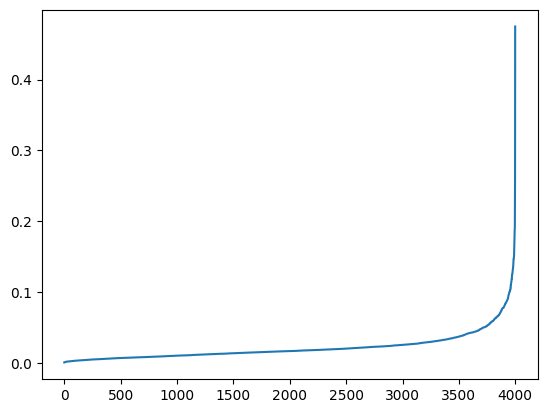

In [34]:
neighbors = NearestNeighbors(n_neighbors=8) # set n_neighbors to the MinPts you want to analyze (try 8 for good results)
neighbors_fit = neighbors.fit(my_dummy_data)
distances, indices = neighbors_fit.kneighbors(my_dummy_data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [54]:
# Call DBSCAN and fit a model on the same dataset

dbscan = DBSCAN(eps = 0.12, min_samples = 8) 
dbscan = dbscan.fit(my_dummy_data)

Analyze the assigned labels in order to retrieve the number of clusters and noise points
- `-1` is the label assigned to noise points

In [55]:
labels=dbscan.labels_
print("type(labels)=",type(labels))
print(labels)

nl=np.unique(labels)
print("Assigned labels: ",nl)

n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)

n_noise = list(labels).count(-1)

print("Estimated number of clusters:", n_clusters)
print("Estimated number of noise points:",n_noise, "representing ",n_noise*100/dummy_dataset.shape[0],"%")

type(labels)= <class 'numpy.ndarray'>
[0 1 0 ... 2 0 2]
Assigned labels:  [-1  0  1  2  3]
Estimated number of clusters: 4
Estimated number of noise points: 149 representing  3.725 %


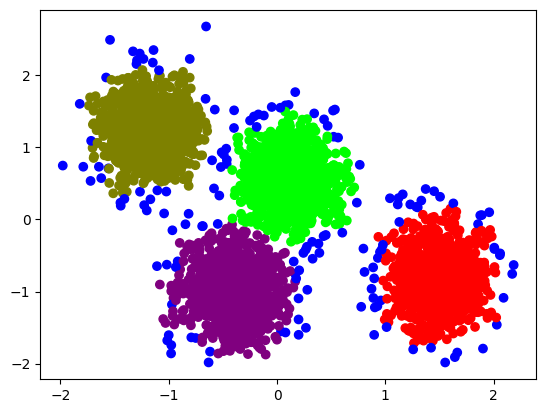

In [56]:
# Visualize clusters using different colors for different labels
plt.scatter(my_dummy_data[:, 0], my_dummy_data[:,1], c = dbscan.labels_, cmap ="brg")
plt.show()

In [57]:
# Read dummy_dataset.csv file and visualize the first records
dummy_dataset_bis = pd.read_csv("dataset/dummy_dataset.csv", sep = ';')
print(dummy_dataset_bis.head())
print(dummy_dataset_bis.shape)

my_dummy_data_bis = dummy_dataset_bis.to_numpy()
my_dummy_data_bis = scaler.fit_transform(my_dummy_data_bis)
print(my_dummy_data_bis[:5])

   Feature1-bis  Feature2-bis
0     -2.549591      2.564382
1      6.919673     -7.684989
2      6.595795    -11.060815
3      3.777644     -3.560102
4      5.478495     -5.704121
(600, 2)
[[-0.95308378  1.01935241]
 [ 1.2580684  -0.889631  ]
 [ 1.18244011 -1.51839105]
 [ 0.52437831 -0.12135541]
 [ 0.92154139 -0.52068704]]


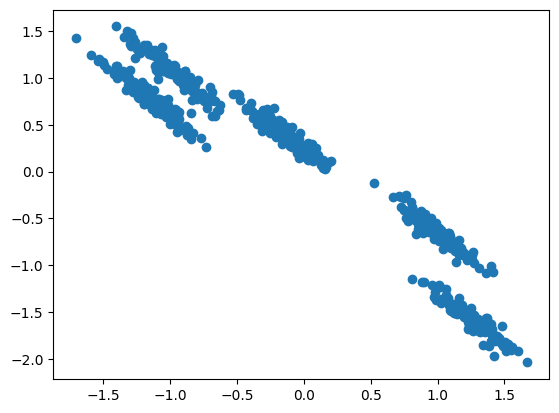

In [58]:
#  Visualize the data (2D scatter plot)
plt.scatter(my_dummy_data_bis[:,0],my_dummy_data_bis[:,1])
plt.show()

In [59]:
# Apply kmeans with k=5 
kmeans_bis = build_kmeans(5, my_dummy_data_bis)

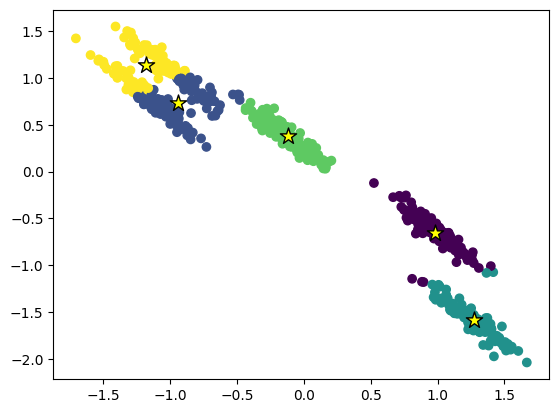

In [60]:
# Visualize centers and colored clusters
plt.scatter(my_dummy_data_bis[:,0],my_dummy_data_bis[:,1], c = kmeans_bis.labels_)
plt.scatter(kmeans_bis.cluster_centers_[:,0], kmeans_bis.cluster_centers_[:,1], marker = "*", c = "yellow", s=150, edgecolors="black")
plt.show()

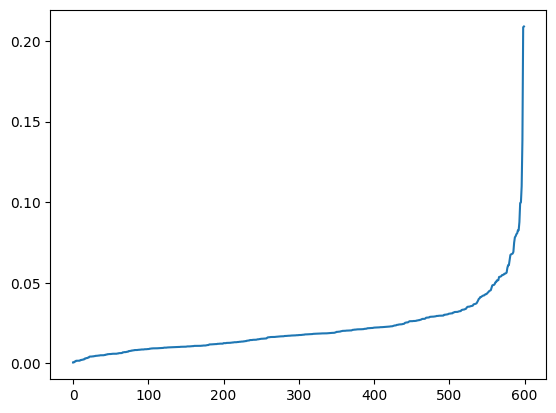

In [61]:
# Use the elbow method defined above to plot, for each point, the k-th neighbor distance 
# n_neighbors=3 is a good value for this dataset

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(my_dummy_data_bis)
distances, indices = neighbors_fit.kneighbors(my_dummy_data_bis)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [72]:
dbscan_bis = DBSCAN(eps = 0.09, min_samples = 3)
dbscan_bis = dbscan_bis.fit(my_dummy_data_bis)

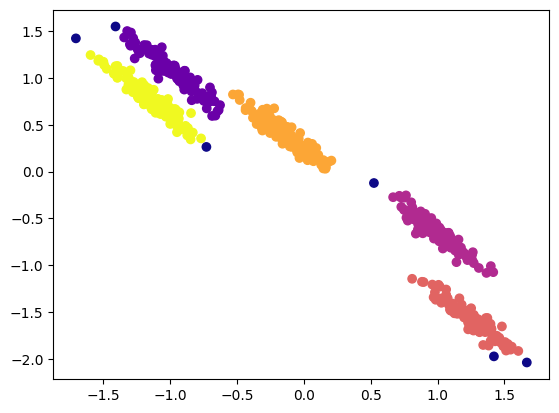

In [73]:
# visualize the colored clusters
plt.scatter(my_dummy_data_bis[:,0],my_dummy_data_bis[:,1], c = dbscan_bis.labels_, cmap = "plasma")
plt.show()

## **Agglomerative Clustering**

Look ad Agglomerative CLustering [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

[2 1 2 ... 0 2 0]


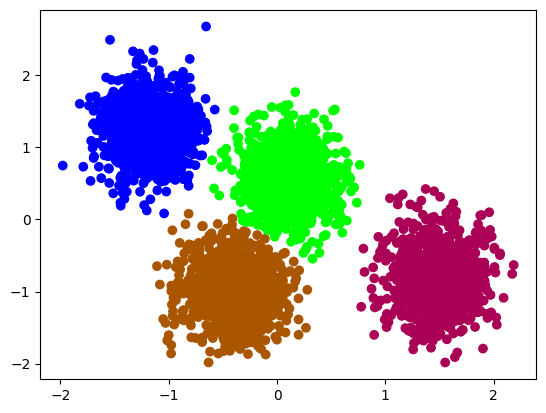

In [74]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4, metric ="euclidean", linkage= "average") #single/average/complete/ward

y_agglo = agglo.fit_predict(my_dummy_data)
print(y_agglo)
plt.scatter(my_dummy_data[:, 0], my_dummy_data[:,1], c=y_agglo, cmap ="brg") # y_agglo =  labels_
plt.show()

To visualize the dendogram we can use the scipy library in this case also the clustering is made by the methods in scipy

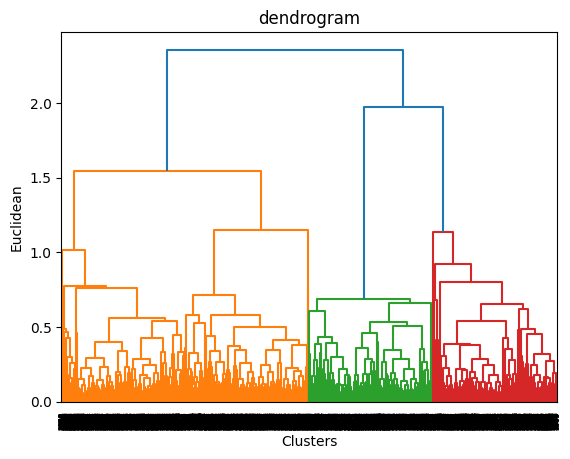

In [75]:
import scipy.cluster.hierarchy as sch

out_linkage=sch.linkage(my_dummy_data, method = "average")
d = sch.dendrogram (out_linkage)
plt.title("dendrogram")
plt.xlabel("Clusters")
plt.ylabel("Euclidean")
plt.axhline(y = 4.5, color = "r", linestyle = "-")
plt.axhline(y = 3.5, color = "black", linestyle = "-")
plt.axhline(y = 2.5, color = "yellow", linestyle = "-")
plt.show()


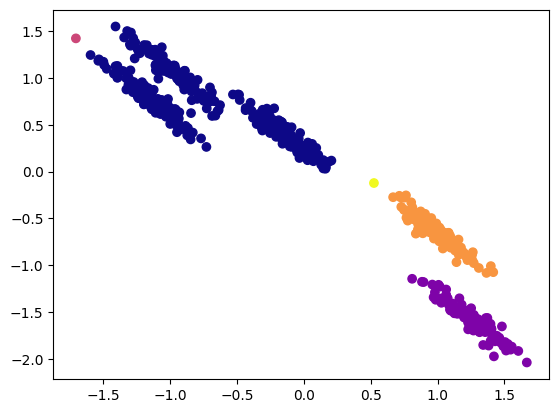

In [80]:
 #single/average/complete/ward
agglo_bis = AgglomerativeClustering(n_clusters= 5, metric = "euclidean", linkage ="single")
y_agglo_bis = agglo_bis.fit_predict(my_dummy_data_bis)

plt.scatter(my_dummy_data_bis[:,0],my_dummy_data_bis[:,1], c = y_agglo_bis,cmap = "plasma")
plt.show()